    Nakanshi2006: arxiv:astro-ph/0610769

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def Polynom(x, a,b,c,d):
    P = a*x**3+b*x**2+c*x+d
    return P
MP =  [8.73,1.28,.76,.75,.83,.66,.48,.26,.09,.05,.03]
FWHM= [48,56,68,88,78,102,84,90,186,182,160]
x = np.linspace(0,10,11)
LogMP = np.zeros(11)
for i in range(len(x)):
    LogMP[i]=np.log10(MP[i])

popt,pcov = curve_fit(Polynom, x, LogMP)
popt2,pcov2 = curve_fit(Polynom,x,FWHM)

In [6]:
def Nakanshi(R,z):
    return 10**Polynom(R/1000,*popt)*np.exp(-np.log(2)*(z/Polynom(R/1000,*popt2))**2)

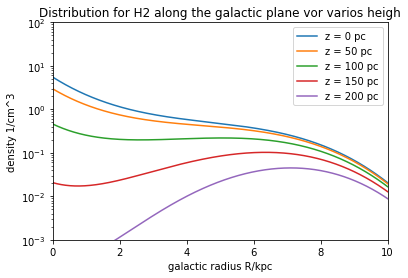

In [13]:
R=np.linspace(0,10000,5000)
plt.figure()
for i in range(5):
    plt.plot(R/1000,Nakanshi(R,i*50),label='z = {} pc'.format(i*50))
plt.yscale('log')
plt.axis([0,10,10**-3,10**2])
plt.legend()
plt.xlabel('galactic radius R/kpc')
plt.ylabel('density 1/cm^3')
plt.title('Distribution for H2 along the galactic plane vor varios heigh')
plt.show()

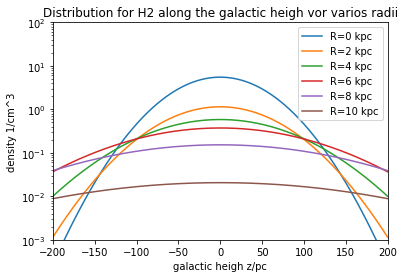

In [17]:
z=np.linspace(-200,200,500)
plt.figure()
for i in range(6):
    plt.plot(z,Nakanshi(i*2000,z),label = 'R={} kpc'.format(2*i))
plt.yscale('log')
plt.axis([-200,200,10**-3,10**2])
plt.legend()
plt.xlabel('galactic heigh z/pc')
plt.ylabel('density 1/cm^3')
plt.title('Distribution for H2 along the galactic heigh vor varios radii')
plt.show()

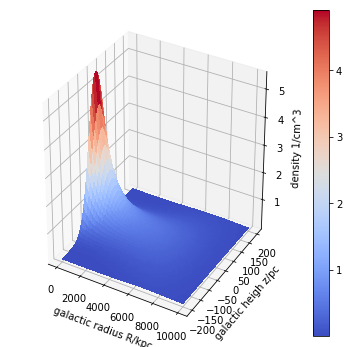

In [24]:
X,Y = np.meshgrid(R,z)
Z = np.zeros((len(R),len(z)))
for i in range(len(z)):
    for j in range(len(R)):
        Z[j,i]=Nakanshi(R[j],z[i])
Z = Z.T
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p)
ax.set_zlabel('density 1/cm^3')
ax.set_ylabel('galactic heigh z/pc')
ax.set_xlabel('galactic radius R/kpc')
plt.show()

